In [13]:
import numpy as np
import matplotlib.pyplot as plt
from NumOpt.OptimizationProblem import OptimizationProblem
from NumOpt.post_processing import plot_histories

In [14]:
# problem parameters
l1 = 9
k1 = 1
l2 = 6
k2 = 10
yc = 2
xc1 = 7
xc2 = 3
g = 9.81
m = 7/g
args = (l1, k1, l2, k2, yc, xc1, xc2, g, m)


In [15]:
def computePotentialEnergy(x, *args):
    l1, k1, l2, k2, yc, xc1, xc2, g, m = args
    x1 = x[0]
    x2 = x[1]
    U = 0.5* k1 * (np.sqrt((l1+x1)**2 + x2**2)-l1)**2 + 0.5* k2 * (np.sqrt((l2-x1)**2 + x2**2)-l2)**2 - m*g*x2
    return U

def computeConstraint1(x, *args):
    l1, k1, l2, k2, yc, xc1, xc2, g, m = args
    x1 = x[0]
    x2 = x[1]
    constraint = np.sqrt((x1+xc1)**2 + (x2+yc)**2) - l1
    return constraint

def computeConstraint2(x, *args):
    l1, k1, l2, k2, yc, xc1, xc2, g, m = args
    x1 = x[0]
    x2 = x[1]
    constraint = np.sqrt((x1-xc2)**2 + (x2+yc)**2) - l2
    return constraint

def penalizedFunction(x, *args):
    xref = np.array([5.0, 4.0])
    Uref = computePotentialEnergy(xref, *args)
    c1ref = computeConstraint1(xref, *args)
    c2ref = computeConstraint2(xref, *args)
    
    # objective function
    U = computePotentialEnergy(x, *args) / Uref
    c1 = computeConstraint1(x, *args) / c1ref
    c2 = computeConstraint2(x, *args) / c2ref
    
    # penalized function
    weight = 10000
    return U + weight * c1**2 + weight * c2**2

In [16]:
# optimization hyperparameters
mu1 = 1e-4
mu2 = 0.01
tol = 1e-9
maxiter = 100
directionMethod = 'quasi_newton'
stepMethod = 'strong_wolfe'

# bounds
lmin, lmax = -10, 20
dmin, dmax = -9, 13
lguess, dguess = 0.5*(lmin+lmax), 0.5*(dmin+dmax)
initialGuess = np.array([lguess, dguess])

# optimization
prob = OptimizationProblem(nDim=2, bounds=[(lmin, lmax), (dmin, dmax)])
prob.setObjectiveFunction(penalizedFunction, *args)
history = prob.solve(x0=initialGuess, directionMethod=directionMethod, 
                        stepMethod=stepMethod, options={'maxiter':maxiter, 'tol':tol, 'mu1':mu1, 'mu2':mu2})

Final solution:
        l =  0.251027158944624
        d =  3.3332117730508997


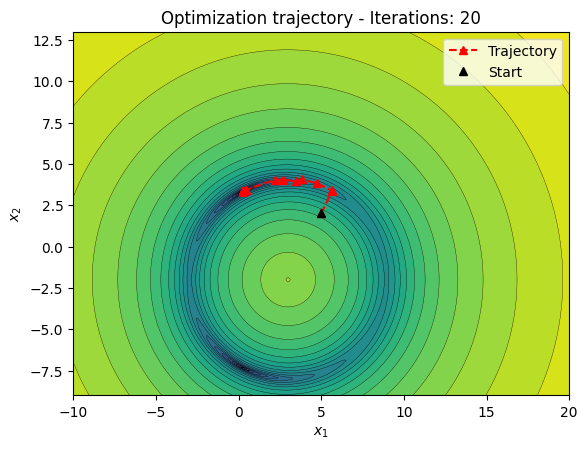

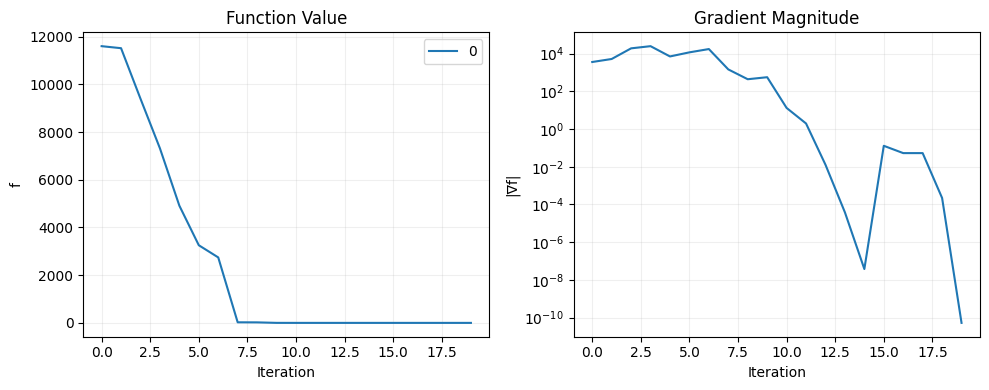

In [20]:
prob.plotSolutionHistory(history, logscale=True)
plot_histories([history], '0.1,0.1', xlog=(False, False), ylog=(False, True))
print('Final solution:')
print('        l = ', history['x'][-1][0])
print('        d = ', history['x'][-1][1])